# <b> Deep Learning - Tensor Flow

In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### <b> Random Values

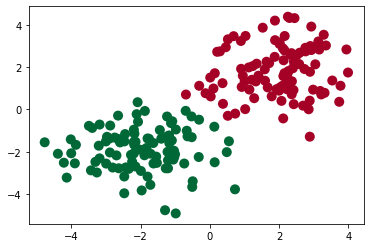

In [19]:
n_data = np.ones((100,2))
type(n_data)
# numpy.random.normal draws random samples from a normal(Gaussian) distribution
x0 = np.random.normal(2*n_data,1)      # class0 x shape =(100,2)
y0 = np.zeros(100)                     # class0 y shape =(100,1)
x1 = np.random.normal(-2*n_data, 1)    # class1 x shape =(100,2)
y1 = np.ones(100)                      # class1 y shape =(100,1)

# vertical stacking
x = np.vstack((x0, x1))    # shape (200,2) + some noise

# horizontal stacking
y = np.hstack((y0, y1))    # shape (200, )

plt.scatter(x[:, 0], x[:, 1], c=y, s=100, lw=0, cmap='RdYlGn')
plt.show()

In [18]:
# input x and y placeholders with x and y shapes 
tf_x = tf.placeholder(tf.float32, x.shape)
tf_y = tf.placeholder(tf.int32, y.shape)
print(tf_x.shape, tf_y.shape)

(200, 2) (200,)


### <b> Initializing Layers

In [12]:
# hidden layer
l1 = tf.layers.dense(tf_x, 10, tf.nn.relu) 
# output layer
output = tf.layers.dense(l1, 2)           
# cost function
loss = tf.losses.sparse_softmax_cross_entropy(labels=tf_y, logits=output)    

# return (acc, update_op), and create 2 local variable
# squeeze -> Calculates how often `predictions` matches `labels`.
accuracy = tf.metrics.accuracy(labels=tf.squeeze(tf_y), predictions=tf.argmax(output, axis=1),)[1]
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05)
train_op = optimizer.minimize(loss)

### <b> Visualizing Loss

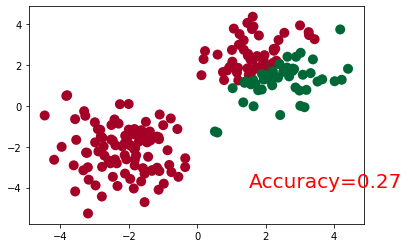

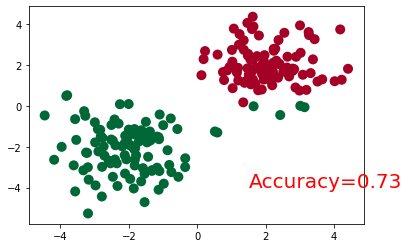

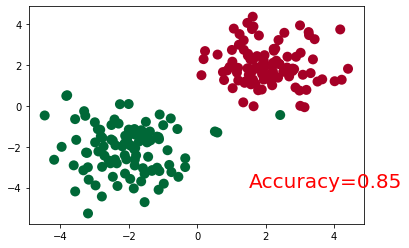

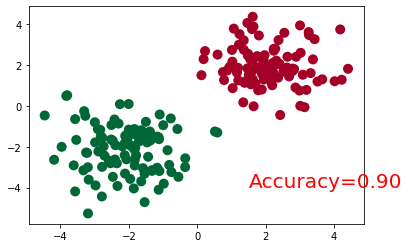

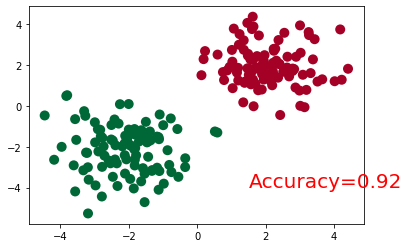

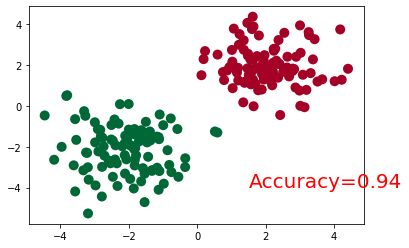

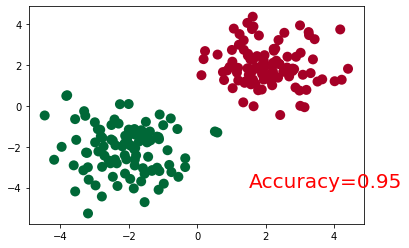

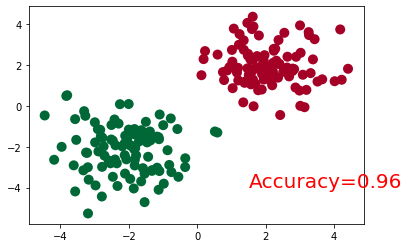

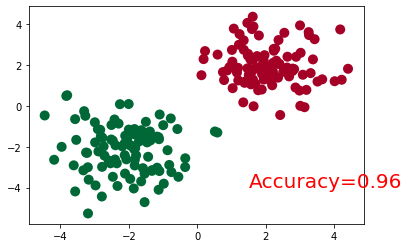

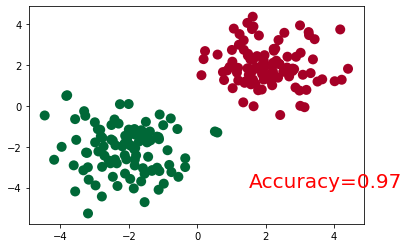

In [13]:
sess = tf.Session()
init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
sess.run(init_op)

plt.ion()
for step in range(100):
    _, acc, pred = sess.run([train_op, accuracy, output], {tf_x: x, tf_y: y})
    if step%10 == 0:
        plt.cla()
        plt.scatter(x[:, 0], x[:, 1], c=pred.argmax(1), s=100, lw=0, cmap='RdYlGn')
        plt.text(1.5, -4, 'Accuracy=%.2f' % acc, fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)
        
plt.ioff()
plt.show()